# PRNI Summer School 2020 - Tutorial for Machine Learning

**Date**: Sep-14th-2020


**Live tutorial time**: 1:00pm - 2:30pm (Central European Summer Time, UTC +2) 

**Live tutorial link**: Please refer to your slack tutorial group

**Wrap-up for tutorial**: A wrap-up lecture will be held by the end of the tutorial at 2:30pm.



**Lecturer**: Prof. Dr. Sebastian Tschiatschek 

**Tutor**: Jiachen Xu


# General Instructions

1. Please try to solve the taks without refering to the pseudocode and solutions.
2. The pseudocode is provided in **Double click to show hint code hint code**. Please note that the provided pseudocode is not necessarily to be the unique solution.
3. The solution is provided in **Double click to show solution**

# Basics of sklearn

The goal of this task is to get used to the basics of scikit-learn and train and compare a few different classifiers/regressors and tune their hyper-parameters.

## Load the UCI breast cancer dataset

Use the scikit-learn function `sklearn.datasets.load_breast_cancer()` to load the breast cancer dataset.

In [1]:
!pip install nilearn
!pip install brainspace

In [ ]:
#@title Double click to show hint code

import sklearn.datasets
data = ...

In [2]:
#@title Double click to show solution 
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
import sklearn
import sklearn.datasets
data = sklearn.datasets.load_breast_cancer()

## Read the description of the dataset and the features used for classification

Study the data structure returned by `sklearn.datasets.load_breast_cancer()`.

**Hint**: The information is encapsulated in the attribute `DESCR` and `feature_names`.

In [3]:
#@title Double click to show solution 
print(data.DESCR)
print(data.feature_names)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [10]:
data.target[[10,50,85]]
list(data.target_names)

#class of malignant and benign given 

['malignant', 'benign']

## Identify the number of samples and features

**Hint:** The data matrix has two dimensions. Please refer to the description to figure out which dimension is the samples and which represents the features.

In [4]:
#@title Double click to show hint code

n_samples = 569
n_features = 30
print("Number of samples: %d" % n_samples)
print("Number of features: %d" % n_features)

Number of samples: 569
Number of features: 30


In [5]:
#@title Double click to show solution

n_samples = data.data.shape[0]#columns 
n_features = data.data.shape[1] #rows 
print("Number of samples: %d" % n_samples)
print("Number of features: %d" % n_features)

Number of samples: 569
Number of features: 30


breast cancer has a data attribute - first dimension number of samples and second dimension number of features (30 numeric attributes)

How many are from one calls and how many from the other - predict the more prominent class. Compute fraction of samples from class 1. Target (1 for 1 class and 0 for the other one) - total number of targets 
best prediction: maximizes probabilty of predicted class 
class 1:62%

## Determine the best constant prediction

The breast dataset describes a two class classification problem. What is the best constant prediction for this dataset in terms of the 0/1-loss?

**Hint:** Compute the probablity of each class first.

In [7]:
#@title Double click to show hint code

prob_class_1 = ...
prob_class_0 = ...
best_constant_prediction = ... # func(prob_class_1, prob_class_2)
print("Best prediction: Class %d" % best_constant_prediction)

TypeError: %d format: a number is required, not ellipsis

In [6]:
#@title Double click to show solution

import numpy as np
prob_class_1 = np.sum(data.target) / len(data.target)#calculate percentage 
prob_class_0 = 1 - prob_class_1 #calculate percentage 
best_constant_prediction = np.argmax([prob_class_0, prob_class_1]) #gives the the largest argument (only gives the index, so in this case 1 (starts with 0))
print("Best prediction: Class %d" % best_constant_prediction)

Best prediction: Class 1


training and testing data sets 
model_selection sub package 
function: train_test_split 

print('train: %d' % len(y_train))
how many samples were used for training 
for all see below:

## Creating a training and a test dataset

Use the scikit-learn function `sklearn.model_selection.train_test_split` to create a training and test dataset. Use 70% of the data for the training data and the remaining 30% of the data for the test set.

**Hint:** Read the function doc [here.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
import sklearn.model_selection as sk
X_train = sk.train_test_spl

In [ ]:
#@title Double click to show hint code

X_train, X_test, y_train, y_test = ... # func(data, label, train=70%, test=30%)

In [15]:
#@title Double click to show solution

import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data.data, data.target, test_size=0.3, train_size=None)
#need to put them in correct order, in the order that the output is (given in documentation)
# data.data just sepcifies the data (the x)
# data.target specifies the Y

## Investigate the feature statistics

Compute the mean, standard deviation and range of the individual features of the training dataset.

**Hint**: 
1.   Use package `numpy` to compute these statistics. To find the appropriate functions, read the related doc [here.](https://numpy.org/doc/stable/reference/routines.statistics.html)
2.   The range of feature indicates the minimum and maximum value of this feature.



In [18]:
import numpy
mean = numpy.mean(y_train)
std = numpy.std(y_train)
print(mean)
print(std)
mmin = numpy.nanmin(y_train)
mmax = numpy.nanmax(y_train)
print (mean, std, mmin, mmax)


0.635678391959799
0.48123941438249124
0.635678391959799 0.48123941438249124 0 1


In [ ]:
#@title Double click to show hint code

# for each_feature in feature_list:
    mean = ... # func(each_feature)
    std = ... # func(each_feature)
    mmin = ... # func(each_feature)
    mmax = ... # func(each_feature)
    print("Feature %d: mean=%f, std=%f, min=%f, max=%f" % (each_feature, mean, std, mmin, mmax))

In [19]:
#@title Double click to show solution

for f in range(n_features):
    mean = np.mean(X_train[:,f]) # first row then column 
    std = np.std(X_train[:,f])
    mmin = np.min(X_train[:,f])
    mmax = np.max(X_train[:,f])
    print("Feature %d: mean=%f, std=%f, min=%f, max=%f" % (f, mean, std, mmin, mmax))

Feature 0: mean=14.130583, std=3.513679, min=6.981000, max=28.110000
Feature 1: mean=19.044070, std=4.133749, min=9.710000, max=33.810000
Feature 2: mean=91.966382, std=24.161267, min=43.790000, max=188.500000
Feature 3: mean=655.079648, std=347.922882, min=143.500000, max=2499.000000
Feature 4: mean=0.096561, std=0.013986, min=0.062510, max=0.163400
Feature 5: mean=0.103228, std=0.049860, min=0.019380, max=0.311400
Feature 6: mean=0.087724, std=0.077369, min=0.000000, max=0.426800
Feature 7: mean=0.048883, std=0.038388, min=0.000000, max=0.201200
Feature 8: mean=0.181341, std=0.026911, min=0.106000, max=0.304000
Feature 9: mean=0.062772, std=0.006737, min=0.050250, max=0.095020
Feature 10: mean=0.406670, std=0.278126, min=0.115300, max=2.873000
Feature 11: mean=1.209885, std=0.570172, min=0.362100, max=4.885000
Feature 12: mean=2.882638, std=2.040939, min=0.757000, max=21.980000
Feature 13: mean=40.518008, std=43.879257, min=6.802000, max=525.600000
Feature 14: mean=0.006973, std=0.00

not yet standardized data, would have an effect if you train certain models

## Train a logistic regression classifier

Train a logistic regression classifier available through `sklearn.linear_model.LogisticRegression` on the training data. Compute the accuracy on the training and test set.

**Hint**: 
1.   To better understand how to use `sklearn` package to train a classifier and make predictions, please refer to [here.](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting) 
2.   To score the predictions, i.e., the predicted labels, there exist numerious metrics. In this tutorial, we only use `accuracy` as our metric. Please read the related doc [here](https://scikit-learn.org/stable/modules/model_evaluation.html) to find the appropriate scoring function. 



In [ ]:
import sklearn.linear_model 
import sklearn.metrics


In [ ]:
#@title Double click to show hint code

clf = ... # Instantiate a Logistic Regression classifier with solver as'liblinear'
... # Train the LR classifier using the training dataset
y_predict = ... # Make predictions for the training & testing dataset
acc = ... # Use propoer scoring function to compute the accuracy of your predictions
print("Accuracy on test data: %.2f %%" % acc_train)
print("Accuracy on test data: %.2f %%" % acc_test)

In [ ]:
#@title Double click to show solution

import sklearn.linear_model
import sklearn.metrics
clf = sklearn.linear_model.LogisticRegression(solver='liblinear', max_iter=1000)#sover tells you how to solve optimization background , and how many integeration the solver can run 
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)#make predictions 
acc_train = sklearn.metrics.accuracy_score(y_train, y_pred_train)#from metrics subpackage to compute 01 accuracy to see how often predicted values are the same
print("Accuracy on training data: %.2f %%" % acc_train)
y_pred_test = clf.predict(X_test)#same computed for the test data 
acc_test = sklearn.metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy on test data: %.2f %%" % (100*acc_test)

## Generalization of the learned classifier

Train and evaluate a sequence of classifiers trained on increasing amounts of training data. To do this, 


1. Use increasing fractions of the training data (10%, 20%, ...) for learning a logistic regression classifier
2. Evaluate it on the **fixed test data** you have created
3. Average your results over **multiple random selections** of the training data for each fraction (average at least 10 times)
4. Plot the results (*x-axis*: fraction of training data; *y-axis*: accuracy on training data (the fraction the model was trained on) / accuracy on test data).
5. What do you conclude from the plot?


**Hint**:
2. To randomize the data or generate random indices, you can use `numpy` package which can be refered from [here.](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)
1. To plot the figure, please use `from matplotlib import pyplot as plt` & `plt.plot()`. For more detailed usage, please refer to [here.](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html)

In [ ]:
#@title Double click to show hint code


# Step 1: Define the training fraction list, e.g., [10%, 20%, ..., 100%]
# Step 2: Choose one fraction number from the above list.
# Step 3: Select the training data randomly based on given fraction.
# Step 4: Train the classifier based on randomly selected training data
#         and evaluate the accuracy based on selected training data 
#         & fixed testing data
# Step 5: Repeat step 3&4 for at least 10 times to get the lists of accuracies 
#         and average them to get the mean accuracy under given fraction
# Step 6: Return to step 2 to change another fraction number
#         until enumerating all elements in the fraction list.
# Step 7: Plot two curves: the one is the accuracies for the training dataset,
#         and the other one is for the fixed testing dataset.
#         Also properly denote the two curves by using 
#         plt.plot(..., label='train'/'test')

In [20]:
#@title Double click to show solution

n_average = 10
train_fraction = np.linspace(0.1, 1.0, 10)
perf_train = np.zeros(len(train_fraction))
perf_test = np.zeros(len(train_fraction))
n_train = X_train.shape[0]
for idx, fraction in enumerate(train_fraction):
    for i in range(n_average):
        perm = np.random.permutation(n_train)
        indices = perm[:int(fraction * n_train)]
        clf.fit(X_train[indices], y_train[indices])
        y_pred_train = clf.predict(X_train[indices])
        acc_train = sklearn.metrics.accuracy_score(y_train[indices], y_pred_train)
        y_pred_test = clf.predict(X_test)
        acc_test = sklearn.metrics.accuracy_score(y_test, y_pred_test)
        perf_train[idx] += acc_train
        perf_test[idx] += acc_test
perf_train /= n_average
perf_test /= n_average

from matplotlib import pyplot as plt
plt.plot(train_fraction, perf_train, label="train")
plt.plot(train_fraction, perf_test, label="test")
plt.xlabel("Fraction of training data")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

NameError: name 'clf' is not defined

see graph 

## Advanced: Feature Selection

The breast cancer dataset consists of 30 features. We want to select a subset of the features which still yields good classification accuracy to better understand the importance of the features. We aim to to do so using **greedy forward feature selection**, i.e., we train classifiers on increasing subsets of the features, and starting from a set consisting of a single feature, add the features which increase the classification performance most iteratively. Output an order list of features (ordered by when they were added). You should be able to answer the following questions:

1. What are the 5 most important features?
2. What is the training and test accuracy of the model using the first best features, the two best features, ...?
3. How many features are required to achieve maximum test accuracy?

In [ ]:
#@title Double click to show hint code

# Step 1: Start with ONE feature to train & evaluate the classifier
#         to get the list of accuracies with the shape of number of features
#         until enumerating all features.
# Step 2: Find the feature associated with best accuracy and 
#         save its index to a 'best_feature_list'
# Step 3: Train a new classfier using the training dataset and 
#         features saved in the 'best_feature_list'
# Step 4: Evaluate the trained classfier from step 3 with using 
#         test dataset and features saved in the 'best_feature_list' 
# Step 5: Save the best accuracy from step 2 (or 8) and accuracy
#         from step 4 into seperate lists of accuracy,
#         i.e., acc_train, acc_test.
# Step 6: Use all features saved in 'best_feature_list' and 
#         append this feature matrix with ONE additional 
#         feature which does not exist in the 'best_feature_list'.
# Step 7: Use training dataset and appended feature matrix from 
#         Step 6 to train & evaluate a new classifier.
# Step 8: Find the new appended features associated with best 
#         accuracy computed from Step 7 and append its index 
#         to the 'best_feature_list'
# Step 9: Repeat Step 3-8 until the length of 'best_feature_list'
#         is equal to the number of features.

In [ ]:
#@title Double click to show solution

features = []
performances = []
performances_test = []
for it in range(n_features):
    candidates = [i for i in range(n_features) if i not in features]
    # evaluate candidates on top of already selected features
    performance = np.zeros(len(candidates))
    for idx, candidate in enumerate(candidates):
        selected = list(features)
        selected.append(candidate)
        X = X_train[:,selected]
        clf.fit(X, y_train)
        y_pred_train = clf.predict(X)
        acc_train = sklearn.metrics.accuracy_score(y_train, y_pred_train)
        performance[idx] = acc_train
    
    # select best feature to add
    best_idx = np.argmax(performance)
    performances.append(np.max(performance))
    features.append(candidates[best_idx])
    
    # test performance
    X = X_train[:,features]
    clf.fit(X, y_train)
    X = X_test[:,features]
    y_pred_test = clf.predict(X)
    acc_test = sklearn.metrics.accuracy_score(y_test, y_pred_test)
    performances_test.append(acc_test)

# print list of selected features
for fidx in features:
    print("Feature %02d: %s => Acc train=%.2f / Acc test=%.2f" % (fidx, data.feature_names[fidx], performances[fidx], performances_test[fidx]))

select small expressive set of features 
ask domain expert whether these features make sense 
with more features you get more noise 
and the easier it become to fit data 
loop for all feature picked and select somehow which feature improves most 
- get list from most to least important feature - one already gives you quite good performance - in this case even drops if you select more features 



## Train a Neural Network Classifier

Train a neural network classifier (`MLPClassifier` from `sklearn.neural_network`) using the following settings: `hidden_layer_sizes=(10), solver='adam', n_iter_no_change=100, max_iter=10000, alpha=0`. Compute the accuracy on the training and test data. You should oberve much worse performance than with logistic regression before. What might be the reason?

**Hint**: the usage of `MLPClassifier` can be referred from [here.](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
#@title Double click to show hint code

clf = ... # Instantiate a multilayer perceptron (MLP) classifier with above mentioned parameters
... # Train the MLP classifier using the training dataset
y_predict = ... # Make predictions for the training & testing dataset
acc = ... # Use propoer scoring function to compute the accuracy of your predictions
print("Accuracy on test data: %.2f %%" % acc_train)
print("Accuracy on test data: %.2f %%" % acc_test)

In [ ]:
#@title Double click to show solution

import sklearn.neural_network
from sklearn.neural_network import MLPClassifier

clf =  MLPClassifier(hidden_layer_sizes=(10), solver='adam', n_iter_no_change=100, max_iter=10000, alpha=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
acc_train = sklearn.metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy on training data: %.2f %%" % acc_train)
y_pred_test = clf.predict(X_test)
acc_test = sklearn.metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy on test data: %.2f %%" % acc_test)

neural.network package includes the Classifier with many opptions - hidden layer, how solved, how big,... 
can fit it, predict accuracies, this was applied to unclassified data, hence only 60% performance 

Normalize the data before learning the MLP Classifier. You can use `MinMaxScaler` from `sklearn.preprocessing` for that purpose. What performance does your MLP classifier achieve now? How did the feature statistics change by applyting the `MinMaxScaler`?

**Hint**: the usage of `MinMaxScaler` can be referred from [here.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
#@title Double click to show hint code

# Step 1: Normalize the training data
# Step 2: Instantiate a new MLP classifier
# Step 3: Train the new MLP classifier with normalized training data
# Step 4: Use the same normalization settting to transform test data
# Step 5: Evaludate the new classifier with normalized training and test data 

In [ ]:
#@title Double click to show solution
import sklearn.neural_network
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

clf =  MLPClassifier(hidden_layer_sizes=(10), solver='adam', n_iter_no_change=100, max_iter=10000, alpha=0)
clf.fit(scaler.transform(X_train), y_train)
y_pred_train = clf.predict(scaler.transform(X_train))
acc_train = sklearn.metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy on training data: %.2f %%" % acc_train)
y_pred_test = clf.predict(scaler.transform(X_test))
acc_test = sklearn.metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy on test data: %.2f %%" % acc_test)

here normalized data to get better performance 

## Selecting a Classifier

We want to pick the best classifier among Logistic Regression, MLP Classifier and a decision tree classifier (`sklearn.tree.DecisionTreeClassifier`). We therefore need to learn these models and evaluate. Run this experiment on the already chosen split of training and testing data. What result do you get? Which model works best? Is this consistent on the training and test data?

**Hint**: for the usage of decision tree classifier, please refer to [here.](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [ ]:
#@title Double click to show hint code

# Step 1: Define a list of instantiated classifiers, 
#         i.e., LR, MLP and decision tree.
# Step 2: Train each classifier with training data and 
#         evaluate with both training and test data

In [ ]:
#@title Double click to show solution
from sklearn.tree import DecisionTreeClassifier

classifiers = {'Logistic Regression': sklearn.linear_model.LogisticRegression(solver='liblinear', max_iter=1000),
               'MLP Classifier': MLPClassifier(hidden_layer_sizes=(10), solver='adam', n_iter_no_change=100, max_iter=10000, alpha=0),
               'Decision Tree': DecisionTreeClassifier()}

for name, clf in classifiers.items():
    print("MODEL: %s" % name)
    clf.fit(scaler.transform(X_train), y_train)
    y_pred_train = clf.predict(scaler.transform(X_train))
    acc_train = sklearn.metrics.accuracy_score(y_train, y_pred_train)
    print("Accuracy on training data: %.2f %%" % acc_train)
    y_pred_test = clf.predict(scaler.transform(X_test))
    acc_test = sklearn.metrics.accuracy_score(y_test, y_pred_test)
    print("Accuracy on test data: %.2f %%" % acc_test)
    print("")

pick among 3 to see which one ist best - repeat and do the same with cross validation 
different performance for each of the folds- shows that the test sets and predictions are random 
need to be careful with evaluation - cross-validation allows you to get rid of some randomness 

Repeat the above experiment but don't use a single training and test set but rather use 10-fold cross-validation (`sklearn.model_selection.cross_val_score`). How stable are the accuracies for all of the models? If you consider the mean of the cross-validation accuracies for each of the model, which model performs best?

**Hint**: for the usage of cross validation and scoring function, please refer to [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [ ]:
#@title Double click to show hint code

# Step 1: Instantiate a model using `cross_val_score`
# Step 2: Read the suggested doc and use it to compute 
#         the accuracy for each classifier.

In [ ]:
#@title Double click to show solution
from sklearn.model_selection import cross_val_score

for name, clf in classifiers.items():
    print("MODEL: %s" % name)
    acc = cross_val_score(clf, data.data, data.target, cv=10)
    print("Scores: ", acc)
    print("Mean acc: %.4f +/- %.4f" % (np.mean(acc), np.std(acc)))
    print("")

# Underfitting/Overfitting and Model Selection on a Regression Task (inspired by the sklearn docs)

To study overfitting we create an artifical dataset for regression. The true data follows a sinusoid function, but our training data is corrupted with noise. Furthermore we have a test set on which we want to achieve good regression performance and, therfore, need to select a good model for regression. To begin, execute the next block of code for generating the training and the testing data. The data will also be visualized.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn.neural_network
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
# from sklearn.neural_network import MLPClassifier

# generate the data
def true_fun(X):
    return np.sin(8*X)

np.random.seed(0)

n_samples = 500
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# select a subset of the data for training and testing
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.95, train_size=None)

# for better visualization, sort test data
order = np.argsort(X_test)
X_test = X_test[order]
y_test = y_test[order]

# visualize data
plt.plot(X_test, true_fun(X_test), 'g-', label="True function")
plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Training Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")

use cross validation to automatically select a good model order (features of order 6 best)

We now want to train linear regressors based on different features constructed from the (first order features, second order features, etc.). With first order features, we clearly can't fit the function perfectly, with higher order features we will fit the data better but also risk to overfit to the training samples. Use `PolynomialFeatures` and `LinearRegression` as well as `Pipeline` to train linear regressors using polynomial features. Visually identify the degree for which there seems to be a good fit of the data (plot your data fit). For which orders of the features do we observe underfitting, for which overfitting? What is the sweetspot?


**Hint**:


1. For the usage `PolynomialFeatures`, please refer to [here.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
2. `Pipeline` is one of the nicest feature of `sklearn`, which can significantly lessen the effort in writing a 'sklearn-style' classificaiton algorithm. An easy user guide can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and for complete usage guidance please refer to [here.](https://scikit-learn.org/stable/modules/compose.html#pipeline)



In [ ]:
#@title Double click to show hint code

# Step 1: Choose one degree for polynomial model fitting.
# Step 2: Instantiate the model of PolynomialFeatures and LinearRegression
# Step 3: Instantiate a Pipeline model based on the two instances 
#         generated from Step 2.
# Step 4: Fit the Pipeline model with training data
# Step 5: Compute the predicted value based on testing data
# Step 6: Using following snippets to plot the true function 
#         and fitted function

"""
plt.plot(test_data, predicted_value, label="Model")
plt.plot(test_data, true_fun(test_data), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}".format(degrees selected from step 1))

"""
# Step 7: Choose another degree and repeat from step 2
#         until completing all desired degrees.

In [ ]:
#@title Double click to show solution

degrees = [1,5,10,20]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train[:,np.newaxis], y_train)

    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}".format(
        degrees[i]))
plt.show()

Using cross-validation, compute scores for each order of the polynomial features. Which order works best? Does it match your result from the previous task?

In [ ]:
#@title Double click to show hint code

# Step 1: Choose one degree for polynomial model from a list of degrees
# Step 2: Instantiate the Pipeline model based on your answer from last question
# Step 3: Use cross_val_score to evaluate the Pipeline instance 
#         using scoring metric as 'neg_mean_squared_error'
# Step 4: Append the obtained score into a list of score which is
#         with the same size of the list of degree
# Step 5: Find the degree associated with best score

In [ ]:
#@title Double click to show solution

degrees = range(1,21)

all_scores = []
for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    #pipeline.fit(X_train[:,np.newaxis], y_train)
    scores = -cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    all_scores.append(np.mean(scores))

best_idx = np.argmin(all_scores)
print("The best performance is achieved for %d-th order features." % degrees[best_idx])

# Bonus: The Best Place for Sunbathing

Assume there was no Corona virus outbreak and we would all be meeting in Austria. Naturally we would be wondering where the best place for sunbathing is (let's assume the best place is the place with the highest temperature). Therefore, I have prepared weather information from a few locations in Austria. Your goal is to learn a regression model that predicts the temperature all over Austria from temperature readings at fixed sensor locations and identify the location with highest temperature.

The data provided to you is temperature information of past 9 days (Sep.3rd.2020 - Sep.11th.2020) in the following form: 
 

1. Files with keyword 'sensor' represent the temperature at 50 locations randomly selected from within Austria and its surrounding.
2. Files with keyword 'full' represent the temperature information at 800 locations from within Austria and its surrounding (50 of these correspond to locations for which you know the temperature).
3. Files with suffix 'train' include the temperature informaition from Sep.3rd. to Sep.10th and files with suffix 'test' contain the temperature of Sep. 11th.  

Train a regression model to predict the temperate at all these 800 locations using the data from the 8 given days. You are then given a test example, also including the temperature at the 50 locations and you are supposed to find the place with the highest temperature. Compare your result to the ground truth temperatures of the test example.


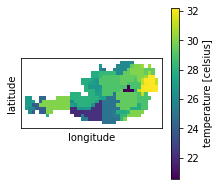

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
y = np.load('2020-08-06-full.npy')
y = y.squeeze()
x = np.load('2020-08-06-sensor.npy')
coordinates_lat, coordinates_lon = np.load('coordinates.npy')

def plot_weather(data, coordinates_lat, coordinates_lon):
    """
    Creating a plot of data in the shape of Austria. Data is a matrix of size 20x40 corresponding
    to the 800 locations.
    """
    mask = np.load("mask.npy")

    pdata = np.multiply(mask, data)
    
    # plot
    plt.figure(figsize=(8 / 2.54, 8 / 2.54))
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(pdata[::-1])
    cbar = plt.colorbar()
    cbar.set_label('temperature [celsius]')
    plt.show()
            
    
plot_weather(y, coordinates_lat, coordinates_lon)

fills in the temperatures when given some measurement poinst- predict where the temperature is highest 

multiple ways: 
could learn linear regression models as input temperature information and predict temperature everywere 
train on traing data and make prediction and get one max (optimum) BUT problem not direct spatial information hence one could think about other types of models for local neighbourhoods such as neural networks but not necessary 